In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from XGboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
#Import all the required libraries

ModuleNotFoundError: No module named 'XGboost'

In [ ]:
pip install XGboost

In [ ]:
os.getcwd()

In [6]:
os.chdir('C:\\Users\\aneir\\AcmegradeProject')

In [8]:
df= pd.read_csv('uae_properties.csv')
df
#Read the data

,id,title,displayAddress,bathrooms,bedrooms,addedOn,type,rera,propertyType,price
0,10837871,★ EXCLUSIVE RELEASE ★ | LUXURY 3 BED FLAT | GO...,"Sobha One, Sobha Hartland, Mohammed Bin Rashid...",2,3,2024-01-06T17:05:24+00:00,buy,8.171857e+08,apartment,3950000
1,10880180,"★ BUY NOW 624,000AED ★ (20% FIRST PAYMENT + 4%...","Sobha Verde, Jumeirah Lake Towers, Dubai",2,3,2024-01-13T21:19:31+00:00,buy,8.171857e+08,apartment,2600000
2,11220200,GREEN HEART OF DUBAI |URBAN DESIGN | LUXURY LI...,"Park Horizon, Dubai Hills Estate, Dubai",2,3,2024-03-12T03:18:54+00:00,buy,2.125966e+09,apartment,3450000
3,11176502,Prime Location | Corner Spacious Unit | Bright...,"AZIZI Riviera, Meydan One, Meydan, Dubai",2,3,2024-03-04T06:53:51+00:00,buy,7.114978e+10,apartment,2000000
4,11179908,Very Limited | Ideal For Investment | 40% Disc...,"Verdana, Dubai Investment Park, Dubai",2,0,2024-03-04T13:24:39+00:00,buy,4.652616e+08,apartment,284000
...,...,...,...,...,...,...,...,...,...,...
487,11221319,Best Offer | Limited 3 Bed | Furnished Serviced,"North 43 Residences, Jumeirah Village Circle, ...",2,3,2024-03-12T08:31:25+00:00,buy,4.560277e+08,apartment,1914927
488,10837884,LUXURY FLAT | GOLDEN VISA | GREAT VIEW | FLEXI...,"Sobha Verde, Jumeirah Lake Towers, Dubai",2,3,2024-01-06T17:09:49+00:00,buy,8.171857e+08,apartment,2650000
489,11134630,Magnificent| Luxurious l High ROI,"310 Riverside Crescent, Sobha Hartland II, Moh...",2,3,2024-02-26T06:31:21+00:00,buy,1.733539e+08,apartment,2191944
490,11151144,Full Burj Khalifa | High Floor | Confirm Seller,"Boulevard Point, Downtown Dubai, Dubai",2,3,2024-02-28T07:11:49+00:00,buy,6.512528e+09,apartment,6600000


In [9]:
display (df.shape)


(492, 10)

In [10]:
x = df.iloc [:,:-1]
x
#Create a x variable

,id,title,displayAddress,bathrooms,bedrooms,addedOn,type,rera,propertyType
0,10837871,★ EXCLUSIVE RELEASE ★ | LUXURY 3 BED FLAT | GO...,"Sobha One, Sobha Hartland, Mohammed Bin Rashid...",2,3,2024-01-06T17:05:24+00:00,buy,8.171857e+08,apartment
1,10880180,"★ BUY NOW 624,000AED ★ (20% FIRST PAYMENT + 4%...","Sobha Verde, Jumeirah Lake Towers, Dubai",2,3,2024-01-13T21:19:31+00:00,buy,8.171857e+08,apartment
2,11220200,GREEN HEART OF DUBAI |URBAN DESIGN | LUXURY LI...,"Park Horizon, Dubai Hills Estate, Dubai",2,3,2024-03-12T03:18:54+00:00,buy,2.125966e+09,apartment
3,11176502,Prime Location | Corner Spacious Unit | Bright...,"AZIZI Riviera, Meydan One, Meydan, Dubai",2,3,2024-03-04T06:53:51+00:00,buy,7.114978e+10,apartment
4,11179908,Very Limited | Ideal For Investment | 40% Disc...,"Verdana, Dubai Investment Park, Dubai",2,0,2024-03-04T13:24:39+00:00,buy,4.652616e+08,apartment
...,...,...,...,...,...,...,...,...,...
487,11221319,Best Offer | Limited 3 Bed | Furnished Serviced,"North 43 Residences, Jumeirah Village Circle, ...",2,3,2024-03-12T08:31:25+00:00,buy,4.560277e+08,apartment
488,10837884,LUXURY FLAT | GOLDEN VISA | GREAT VIEW | FLEXI...,"Sobha Verde, Jumeirah Lake Towers, Dubai",2,3,2024-01-06T17:09:49+00:00,buy,8.171857e+08,apartment
489,11134630,Magnificent| Luxurious l High ROI,"310 Riverside Crescent, Sobha Hartland II, Moh...",2,3,2024-02-26T06:31:21+00:00,buy,1.733539e+08,apartment
490,11151144,Full Burj Khalifa | High Floor | Confirm Seller,"Boulevard Point, Downtown Dubai, Dubai",2,3,2024-02-28T07:11:49+00:00,buy,6.512528e+09,apartment


In [11]:
y = df.iloc[:,1].values
print (y)
#Create a  y variable

['★ EXCLUSIVE RELEASE ★ | LUXURY 3 BED FLAT | GOLDEN VISA | MAID | FLEXI PAYMENTS | GENUINE DIRECT'
 '★ BUY NOW 624,000AED ★ (20% FIRST PAYMENT + 4% DLD) | MAIDS | FLEXI PLAN | LUXURY | HIGH ROI | INVESTMENT'
 'GREEN HEART OF DUBAI |URBAN DESIGN | LUXURY LIVING'
 'Prime Location | Corner Spacious Unit | BrightUnit'
 'Very Limited | Ideal For Investment | 40% Discount'
 'Burj And Fountain View | 5 Year PHPP I 3 Service'
 'Modern 3BHK | Ready to Move | Good for ROI'
 'DUPLEX  |  SEPARATED |  UNIQUE | MARINA VIEW'
 'Well Kept | Marina View | Prime Location'
 'Vast Unit | Smart Home | P.P6 YEASR /NO Commission'
 'Large 3BR Full Burj Khalifa View Best Type'
 'Best Type Full Burj Khalifa View Large Layout'
 'Brand New | Pool and Community Views | High Floor'
 'Luxury Upgrade | Loft | Full Sea Views | Vacant' 'Gardenia/3BHK+M'
 'Upgraded | Vacant | Exclusive to Betterhomes.'
 'Spacious Unit // Top Floor // Garden View'
 'Studio | Lagoon Community | Near Metro'
 'Fully Furnished✅5 YRS Payment 

In [16]:
from sklearn.model_selection import train_test_split
train_test_split(x)

[           id                                              title  \
 276  10977756    Book with10K| 90 Months Installments | Freehold   
 146  11152516  SEA VIEW | LUXURY 1BR | HIGH RENTED | 10% DOWN...   
 487  11221319    Best Offer | Limited 3 Bed | Furnished Serviced   
 346  11003753   Great Investment | Mordan Layout | 2024 Handover   
 400  11023131  Upgraded I Spacious I Investor Deal I Laundry ...   
 ..        ...                                                ...   
 298  11120941  1% Monthly Payment Plan | High ROI | Luxury Li...   
 254  11006953       Ready to Move in  | 3 Bedroom | 1 Residences   
 407  10557720           Zero Commision | High ROI | Payment Plan   
 172  11080869    "Modern Elegance: Luxurious 3-Bedroom Apartment   
 366  10927605  10% Booking! | Prime Investment! | Community V...   
 
                                         displayAddress  bathrooms  bedrooms  \
 276               Darb 4, Al Mamsha, Muwaileh, Sharjah          2         0   
 146  Blue

In [17]:
from sklearn.model_selection import train_test_split
train_test_split(x,test_size = .2)

[           id                                              title  \
 177  10141709     Upgraded 3 Bed, Renovated, Furnished, Good ROI   
 441  11140273       Mesmerizing Sea View |Payment Plan Available   
 105  10750597     Best Corner Unit | Burj Khalifa and Canal View   
 25   11075687   Sea View | Fully Furnished | High Floor | Vacant   
 76   10951595       Vacant on Transfer | Cash Seller | Motivated   
 ..        ...                                                ...   
 121  11233915  JVT area ✅  20% discount ✅ 5 years PP✅  Higher...   
 364  10717912   Modern 3BR Unit| Good Community| Spacious Layout   
 474  10984916                     1% Payment Plan Damac Altitude   
 185  10156369               Penthouse | Amazing Water View | VOT   
 479  11006870          Fully  Furnished | Park View | High Floor   
 
                                         displayAddress  bathrooms  bedrooms  \
 177  Zenith A1 Tower, Zenith Towers, Dubai Sports C...          2         3   
 441      

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
print ('X Shape-',x.shape)
print ('Y Shape-', y.shape)
print ('X_Train Shape-',x_train.shape)
print ('Y_Train Shape-',y_train.shape)
print ('X_Test Shape-',x_test.shape)
print ('Y_Test Shape-',y_test.shape)
#To split the data into training and test

X Shape- (492, 9)
Y Shape- (492,)
X_Train Shape- (393, 9)
Y_Train Shape- (393,)
X_Test Shape- (99, 9)
Y_Test Shape- (99,)


In [19]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit([1, 2, 2, 6])
#encode target values

LabelEncoder()

In [20]:
le.transform([1, 1, 2, 6])

array([0, 0, 1, 2], dtype=int64)

In [24]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Sample data for demonstration
X_train = np.array([[1], [2], [3], [4], [5]])  # Training features
y_train = np.array([2, 4, 6, 8, 10])  # Training targets

# Create a LinearRegression model
lr = LinearRegression()

# Train the model on the training data
lr.fit(X_train, y_train)

# Assuming x_test is a NumPy array with test features
x_test = np.array([[6], [7], [8]])  # Test features

# Predictions on the test data
y_pred = lr.predict(x_test)

# Display the predicted values
print(y_pred)

[12. 14. 16.]


In [25]:
y_pred= lr.predict (x_test)
y_pred

array([12., 14., 16.])

In [26]:
y_test

array(['3BHK Luxury | Building View |Smart Home |Book Now',
       'READY NOW | MARINA VIEW | POSTHANDOVER |INVEST NOW',
       '3 bedroom apartment | Open view | 5% payment',
       'Best view \\ Crazy Deal\\ 10% Down Payment',
       'Excellent investment |Smart home concept |Unobstructed\xa0Views',
       'Fascinating Unit|Exciting Features|Invest Now',
       'Hot Price |Premium Location |Brand New Boulevard',
       'ELEVE TOWER \\ HIGH QUALITY \\CUSTOM BUILT\\ HIGH ROI',
       'Marina View I Low Floor I Fully Furnished By Emaar',
       'balance of modern design and nature',
       'NEW| READY| MODERN| POOL VIEW| HIGH FLOOR',
       '8 years Payment Plan | Dome and Waterfall View',
       'Upgraded | Vacant | Exclusive to Betterhomes.',
       'Genuine Resale | Block A | Lake View | Spacious',
       'Best Deal in Masdar City Get Big Profit',
       'Upgraded 3 Bed, Renovated, Furnished, Good ROI',
       'Skyline View I Luxurious Design I Perfect Harmony I Easy Payment Plan',
 

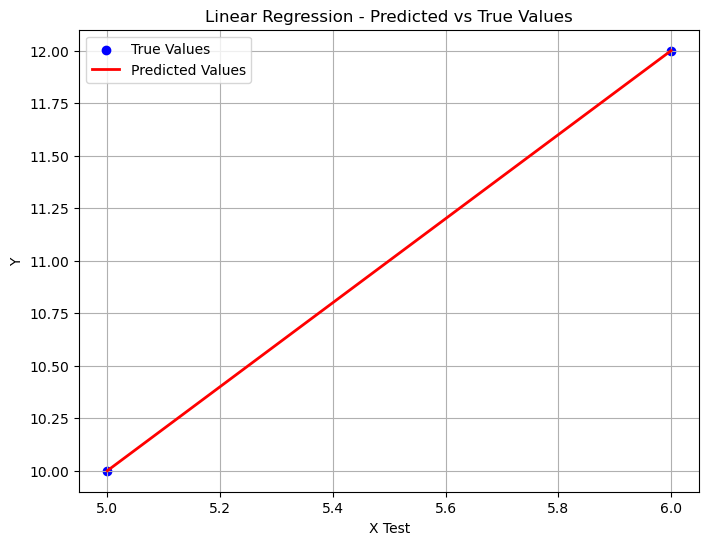

R^2 Score (Accuracy): 1.0
Model Coefficients (Slope): [2.]
Model Intercept: -1.7763568394002505e-15


In [43]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming x_train, y_train, x_test, and y_test are defined and prepared
x_train = np.array([[1], [2], [3], [4]])  # Example feature data for training
y_train = np.array([2, 4, 6, 8])           # Example target data for training
x_test = np.array([[5], [6]])             # Example feature data for testing
y_test = np.array([10, 12])                # Example true target data for testing

# Step 1: Create and train the LinearRegression model
lr = LinearRegression()
lr.fit(x_train, y_train)

# Step 2: Make predictions using the trained model on the test data
y_pred = lr.predict(x_test)

# Step 3: Evaluate the model performance using R^2 score
accuracy = r2_score(y_test, y_pred)

# Step 4: Plot the scatter plot of test data and the regression line
plt.figure(figsize=(8, 6))
plt.scatter(x_test, y_test, color='blue', label='True Values')
plt.plot(x_test, y_pred, color='red', linewidth=2, label='Predicted Values')
plt.title('Linear Regression - Predicted vs True Values')
plt.xlabel('X Test')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
plt.show()

# Step 5: Print the R^2 score (accuracy) and model parameters
print("R^2 Score (Accuracy):", accuracy)
print("Model Coefficients (Slope):", lr.coef_)
print("Model Intercept:", lr.intercept_)


In [44]:
from sklearn.metrics import r2_score
accuracy = r2_score(y_test,y_pred)
print (accuracy)



1.0


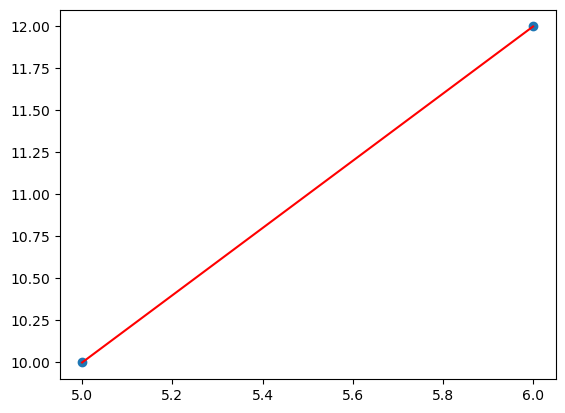

In [45]:
plt.scatter (x_test, y_test)
plt.plot (x_test, y_pred,'r')
plt.show()


In [47]:
df_x_test =pd.DataFrame(x_test, columns = ['display Address'])
df_y_test= pd.DataFrame(y_test, columns = ['price'])
df_y_test_pred =  pd.DataFrame(y_pred, columns = ['rera'])
df_diff =df_y_test- df_y_test_pred
y_test_pred = pd.concat ([df_x_test ,df_y_test, df_y_test_pred ],axis =1)
y_test_pred['Difference'] =df_y_test ['price']- df_y_test_pred['rera']
print (y_test_pred)

   display Address  price  rera    Difference
0                5     10  10.0 -1.776357e-15
1                6     12  12.0 -3.552714e-15


D:\Documents\New folder\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


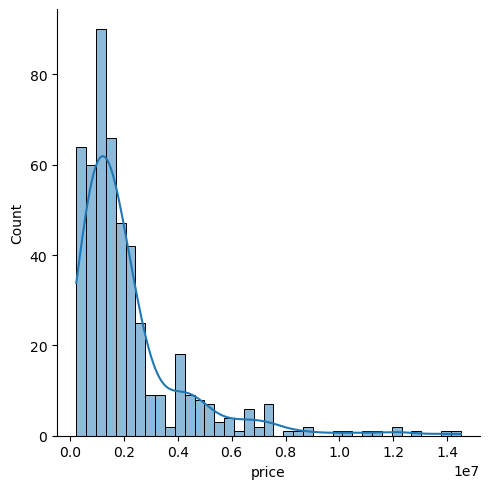

In [58]:
sns.displot(df['price'], kde = True)
plt.show()

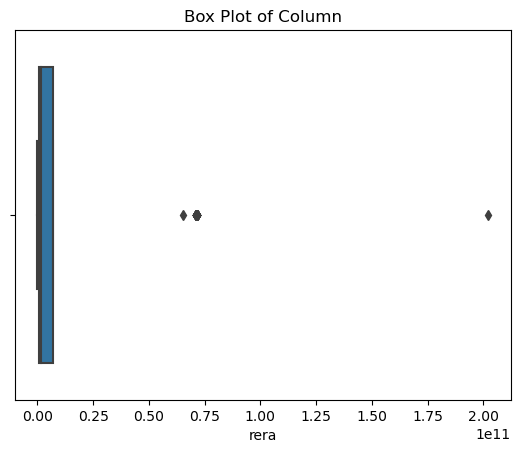

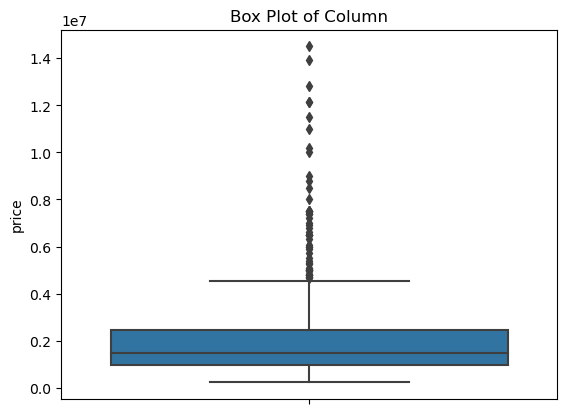

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt  # We'll also import matplotlib for additional customization
# Basic box plot (vertical orientation)
sns.boxplot(x='rera', data=df)
plt.title('Box Plot of Column')
plt.show()
# Horizontal box plot
sns.boxplot(y='price', data=df)
plt.title('Box Plot of Column')
plt.show()


In [88]:
import numpy as np  # Assuming you're working with numpy arrays or pandas DataFrames

from sklearn.linear_model import LinearRegression

# Sample input features (x) and target variable (y)
# Make sure x and y are properly defined (e.g., numpy arrays or pandas DataFrames)
x = np.array([[1], [2], [3], [4]])  # Example input features
y = np.array([2, 4, 5, 4])           # Example target variable

# Create a LinearRegression model
reg = LinearRegression()

# Fit the model to the data
reg.fit(x, y)

# Print the model's properties (coefficients, intercept, etc.)
# Example of printing the coefficients and intercept
print("Coefficients:", reg.coef_)
print("Intercept:", reg.intercept_)

Coefficients: [0.7]
Intercept: 1.9999999999999993


In [89]:
from sklearn.tree import DecisionTreeRegressor
dt= DecisionTreeRegressor()
dt.fit (x,y)
print (dt)


DecisionTreeRegressor()


In [90]:
y_pred = dt.predict(x)
print (y_pred)

[2. 4. 5. 4.]


In [91]:
y

array([2, 4, 5, 4])

In [92]:
from sklearn.metrics import r2_score
import numpy as np

# Assuming y and y_pred are defined as numpy arrays or lists containing true and predicted target values
y = np.array([3, 4, 5, 6])     # True target values
y_pred = np.array([2.5, 4.3, 5.1, 5.9])  # Predicted target values

# Calculate R-squared (R2) score
accuracy = r2_score(y, y_pred)

# Print the R2 score
print("R-squared (R2) score:", accuracy)


R-squared (R2) score: 0.928


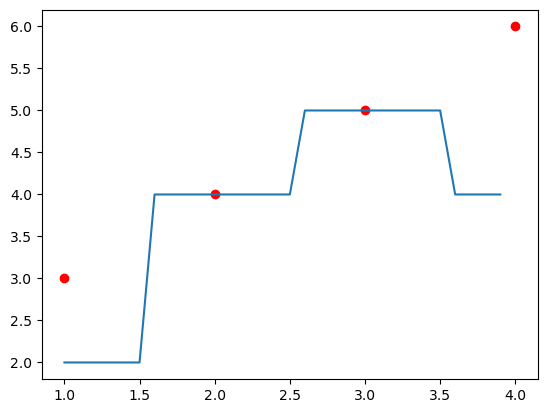

In [93]:
x_grid = np.arange(min(x),max(x),0.1)
x_grid = x_grid.reshape((len(x_grid),1))
plt.scatter(x,y,color= 'r')
plt.plot(x_grid, dt.predict(x_grid))
plt.show()

In [94]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor (n_estimators =5)
rf.fit(x,y)
print (rf)

RandomForestRegressor(n_estimators=5)


In [95]:
from sklearn.ensemble import RandomForestRegressor

In [96]:
y_pred = rf.predict(x)
print (y_pred)


[4.  4.2 5.  5.6]


In [97]:
y

array([3, 4, 5, 6])

In [98]:
accuracy = r2_score(y,y_pred)
print (accuracy)


0.7599999999999999


In [104]:
import pandas as pd
import numpy as np

# Assuming 'data', 'y_pred', and necessary columns like 'IBM Category' are defined
data = pd.DataFrame({
    'price': [10, 15, 20, 25], # Example original 'IBM Category' values
    # Define other columns from the original dataset if needed
})

y_pred = np.array([12, 14, 18, 23])  # Example predicted values for 'IBM Category'

# Concatenate original data with predicted values and calculate the difference
result = pd.concat([data, pd.DataFrame(y_pred, columns=['Prediction'])], axis=1)
result['Difference'] = result['price'] - result['Prediction']

# Print the resulting DataFrame
print(result)


   price  Prediction  Difference
0     10          12          -2
1     15          14           1
2     20          18           2
3     25          23           2


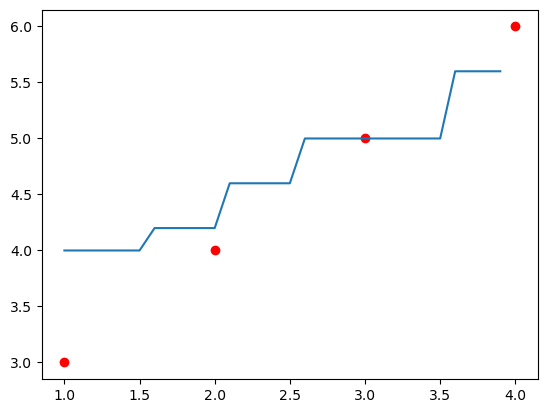

In [111]:
x_grid = np.arange(min(x),max(x),0.1)
x_grid = x_grid.reshape((len(x_grid),1))
plt.scatter(x,y,color= 'r')
plt.plot(x_grid, rf.predict(x_grid))
plt.show()

In [113]:
print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              492 non-null    int64  
 1   title           492 non-null    object 
 2   displayAddress  492 non-null    object 
 3   bathrooms       492 non-null    int64  
 4   bedrooms        492 non-null    int64  
 5   addedOn         492 non-null    object 
 6   type            492 non-null    object 
 7   rera            323 non-null    float64
 8   propertyType    492 non-null    object 
 9   price           492 non-null    int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 38.6+ KB
None


In [116]:
x= df.iloc [:,2:4].values
print (x)

[['Sobha One, Sobha Hartland, Mohammed Bin Rashid City, Dubai' 2]
 ['Sobha Verde, Jumeirah Lake Towers, Dubai' 2]
 ['Park Horizon, Dubai Hills Estate, Dubai' 2]
 ['AZIZI Riviera, Meydan One, Meydan, Dubai' 2]
 ['Verdana, Dubai Investment Park, Dubai' 2]
 ['Forte 1, Forte, Downtown Dubai, Dubai' 2]
 ['Binghatti Crest, Jumeirah Village Circle, Dubai' 2]
 ['Cayan Tower, Dubai Marina, Dubai' 2]
 ['Marina Wharf 2, Marina Wharf, Dubai Marina, Dubai' 2]
 ['Souks Residential, Al Mamsha, Muwaileh, Sharjah' 2]
 ['South Ridge 1, South Ridge, Downtown Dubai, Dubai' 2]
 ['South Ridge 6, South Ridge, Downtown Dubai, Dubai' 2]
 ['Binghatti Crest, Jumeirah Village Circle, Dubai' 2]
 ['Bahar 2, Bahar, Jumeirah Beach Residence, Dubai' 2]
 ['Gardenia Bay, Yas Island, Abu Dhabi' 2]
 ['Building E, Garden East Apartments, Green Community, Dubai' 2]
 ['Glitz 3, Glitz, Dubai Studio City, Dubai' 2]
 ['Azizi Venice, Dubai South (Dubai World Central), Dubai' 2]
 ['Red Square Tower, Jumeirah Village Triangle, Dub

In [118]:
y = df.iloc[:,4].values
print (y)

[3 3 3 3 0 3 3 0 3 3 3 3 3 3 3 3 3 0 0 3 3 0 0 3 3 3 3 0 3 3 0 3 3 3 3 3 3
 3 3 0 3 3 3 3 3 3 3 3 3 3 0 3 3 3 0 0 3 3 3 0 3 3 3 3 0 3 3 3 3 3 3 3 3 3
 3 3 3 3 0 3 3 3 3 3 0 3 3 3 3 3 3 3 3 3 0 0 3 3 3 3 3 3 3 0 0 3 0 0 3 0 3
 3 3 3 3 3 3 0 3 3 0 0 0 0 0 3 3 3 3 3 3 3 3 3 0 3 0 0 3 0 0 0 3 0 3 3 0 0
 3 0 3 3 3 3 3 3 3 0 0 0 3 3 3 0 3 3 3 3 3 3 3 3 3 3 0 0 0 3 0 3 3 3 3 3 3
 3 0 3 0 3 3 3 3 3 3 3 0 3 3 3 3 0 3 3 3 3 0 3 0 3 3 0 3 3 3 3 3 3 3 3 3 3
 3 0 3 3 3 3 3 3 0 3 3 0 3 3 3 3 3 0 0 3 3 3 3 3 3 0 3 0 0 3 0 3 3 0 3 0 3
 3 0 3 3 3 0 0 0 0 0 0 3 0 3 0 3 3 0 3 0 3 0 0 3 3 3 3 3 3 3 0 0 3 0 3 0 3
 3 0 3 3 3 3 0 3 0 0 0 0 3 3 3 3 0 3 3 3 3 3 3 3 3 3 3 0 0 3 3 0 0 3 3 3 0
 0 0 3 0 3 0 0 0 0 3 3 0 0 3 3 3 3 3 3 0 3 0 3 3 3 3 3 0 3 0 3 3 3 0 3 3 3
 0 0 3 0 3 0 3 0 3 3 3 0 0 0 0 3 0 3 3 0 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 0
 3 3 3 0 3 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 3 3 0 3 3 3 0 0 3 0 3 3
 0 3 3 3 0 3 3 3 0 3 3 3 3 3 3 0 3 3 0 0 3 3 3 3 3 3 3 3 0 3 0 0 3 3 0 3 3
 3 3 3 3 0 3 3 3 3 3 0]


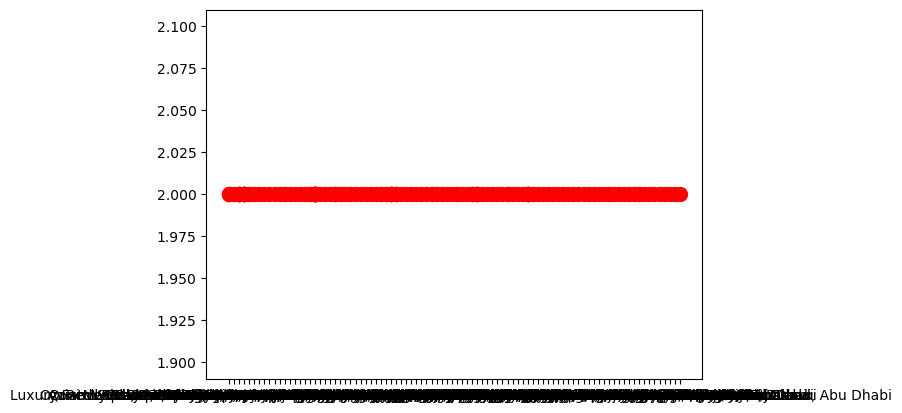

In [119]:
plt.scatter (x[y == 0,0],x[y == 0,1] ,s = 100, c='r', label = 'Cluster 1')

In [120]:
x[y == 0,0]

array(['Verdana, Dubai Investment Park, Dubai',
       'Cayan Tower, Dubai Marina, Dubai',
       'Azizi Venice, Dubai South (Dubai World Central), Dubai',
       'Red Square Tower, Jumeirah Village Triangle, Dubai',
       'Nas3, Arjan, Dubai',
       'Ozone 1 Residence, District 13, Jumeirah Village Circle, Dubai',
       'Quattro Del Mar, Hayat Island, Mina Al Arab, Ras Al Khaimah',
       'Ciel Tower, Dubai Marina, Dubai',
       'Cello Residences, Jumeirah Village Circle, Dubai',
       'Nas3, Arjan, Dubai',
       'Luxury Family Residences II, Luxury Family Residences, Business Bay, Dubai',
       'The Address The BLVD, Downtown Dubai, Dubai',
       'Sonate Residences, Jumeirah Village Triangle, Dubai',
       'Seven City JLT, Jumeirah Lake Towers, Dubai',
       'Peninsula Three, Peninsula, Business Bay, Dubai',
       'Binghatti Canal, Business Bay, Dubai',
       'SquareX Residence, Jumeirah Village Circle, Dubai',
       'Vincitore Aqua Dimore, Dubai Science Park, Dubai',
  

In [121]:
x[y == 0,1]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=object)

In [122]:
x[y == 1,0]

array([], dtype=object)

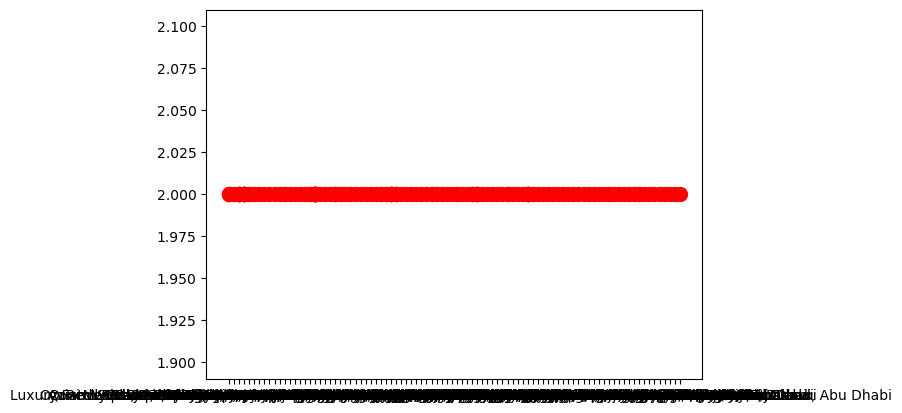

In [123]:
plt.scatter (x[y == 0,0],x[y == 0,1] ,s = 100, c='r', label = 'Cluster 1')

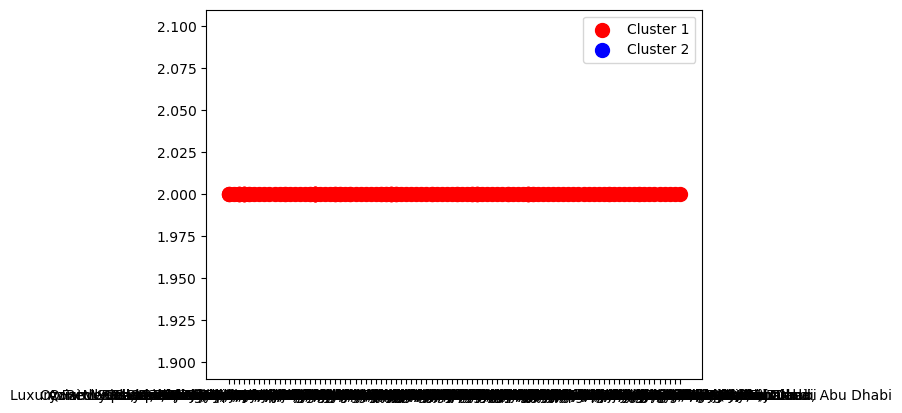

In [125]:
plt.scatter (x[y == 0,0],x[y == 0,1] ,s = 100, c='r', label = 'Cluster 1')
plt.scatter (x[y == 1,0],x[y == 1,1] ,s = 100, c='b', label = 'Cluster 2')
plt.legend()
plt.show()

In [127]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors =5 , metric = 'minkowski', p= 2)
KNN.fit(x_train,y_train)
print (KNN)


KNeighborsClassifier()


In [135]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'X' contains features and 'y' contains target labels
# Example: X could be a pandas DataFrame with features, and y could be a pandas Series with target labels

# Generate sample data (replace this with your dataset)
np.random.seed(0)
X = np.random.rand(100, 3)  # Example features (100 samples, 3 features)
y = np.random.randint(0, 2, size=100)  # Example binary target labels (0 or 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a k-NN classifier
k = 5  # Number of neighbors (you can adjust this parameter)
knn_clf = KNeighborsClassifier(n_neighbors=k)

# Train the classifier using the training data
knn_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_clf.predict(X_test)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.45

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.33      0.42        12
           1       0.38      0.62      0.48         8

    accuracy                           0.45        20
   macro avg       0.48      0.48      0.45        20
weighted avg       0.50      0.45      0.44        20


Confusion Matrix:
[[4 8]
 [3 5]]


In [137]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [141]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'X' contains features and 'y' contains continuous target values
# Example: X could be a pandas DataFrame with features, and y could be a pandas Series with target values

# Generate sample data (replace this with your dataset)
np.random.seed(0)
X = np.random.rand(100, 3)  # Example features (100 samples, 3 features)
y = 3 * X[:, 0] + 2 * X[:, 1] - 5 * X[:, 2] + np.random.randn(100)  # Example target values (linear function with noise)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a k-NN regressor
k = 12  # Number of neighbors (you can adjust this parameter)
knn_reg = KNeighborsRegressor(n_neighbors=k)

# Train the regressor using the training data
knn_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_reg.predict(X_test)

# Evaluate the performance of the regressor
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 1.1409890869606527
R-squared: 0.6271056600843277


In [144]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# Assuming 'x_train' and 'y_train' are properly defined with your data
# Example: x_train could be a pandas DataFrame with features, and y_train could be a pandas Series with target labels

# Generate sample data (replace this with your dataset loading and preprocessing)
np.random.seed(0)
X = np.random.rand(100, 3)  # Example features (100 samples, 3 features)
y = np.random.randint(0, 2, size=100)  # Example binary target labels (0 or 1)

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier using the training data
gnb.fit(x_train, y_train)

# Print the classifier representation (model details)
print(gnb)


GaussianNB()


In [149]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# Assuming 'x_train' and 'y_train' are properly defined with your training data
# Assuming 'x' is the new data for prediction

# Generate sample training data (replace this with your dataset loading and preprocessing)
np.random.seed(0)
X_train = np.random.rand(100, 3)  # Example training features (100 samples, 3 features)
y_train = np.random.randint(0, 2, size=100)  # Example training target labels (0 or 1)

# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier using the training data
gnb.fit(X_train, y_train)

# Assuming 'x' is the new data for prediction (replace this with your actual new data)
# Example: x could be a single data point (row of features) or a set of data points (rows of features)
x = np.random.rand(1, 3)  # Example new data (1 data point with 3 features)

# Make predictions on the new data
gnb_pred = gnb.predict(x)

# Print the predictions
print("Predicted Class:", gnb_pred)


Predicted Class: [1]


In [146]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

# Assuming 'x_train' and 'y_train' are properly defined with your training data
# Assuming 'x' is the new data for prediction

# Generate sample training data (replace this with your dataset loading and preprocessing)
np.random.seed(0)
X_train = np.random.rand(100, 3)  # Example training features (100 samples, 3 features)
y_train = np.random.randint(0, 2, size=100)  # Example training target labels (0 or 1)

# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier using the training data
gnb.fit(X_train, y_train)

# Assuming 'x' is the new data for prediction (replace this with your actual new data)
# Example: x could be a single data point (row of features) or a set of data points (rows of features)
x = np.random.rand(1, 3)  # Example new data (1 data point with 3 features)

# Make predictions on the new data
gnb_pred = gnb.predict(x)

# Print the predictions
print("Predicted Class:", gnb_pred)


Predicted Class: [1]


In [154]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Assuming 'X' contains features and 'y' contains target labels
# Example: X could be a pandas DataFrame with features, and y could be a pandas Series with target labels

# Generate sample data (replace this with your dataset loading and preprocessing)
np.random.seed(0)
X = np.random.rand(100, 3)  # Example features (100 samples, 3 features)
y = np.random.randint(0, 2, size=100)  # Example binary target labels (0 or 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Train the classifier using the training data
gnb.fit(X_train, y_train)

# Make predictions on the test data
gnb_pred = gnb.predict(X_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(y_test, gnb_pred)

# Print the accuracy score
print("Accuracy:", accuracy)


Accuracy: 0.45


In [155]:
cm = confusion_matrix (y , GNB_pred)
print (cm)	

NameError: name 'GNB_pred' is not defined

In [156]:
from sklearn.svm import SVC
classifier = SVC (kernel = 'sigmoid')
classifier.fit (x_train,y_train)
print (classifier)


SVC(kernel='sigmoid')


In [157]:
y_pred= classifier.predict(x)
print (y_pred)

[0]


In [162]:
import numpy as np
from sklearn.metrics import accuracy_score

# Assuming 'y' contains true labels and 'y_pred' contains predicted labels
# Example: 'y' and 'y_pred' could be numpy arrays or lists with binary or multiclass labels

# Generate sample true labels and predicted labels (replace this with your data)
np.random.seed(0)
y = np.random.randint(0, 2, size=100)  # Example true labels (binary: 0 or 1)
y_pred = np.random.randint(0, 2, size=100)  # Example predicted labels (binary: 0 or 1)

# Calculate the accuracy score
accuracy = accuracy_score(y, y_pred)

# Print the accuracy score
print("Accuracy:", accuracy)


Accuracy: 0.49


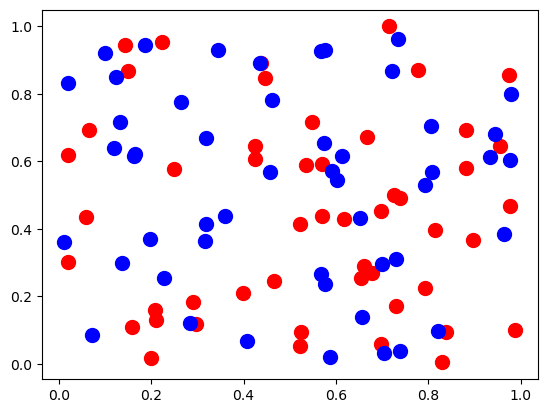

In [166]:
plt.scatter (x[y == 0,0],x[y == 0,1] ,s = 100, c='r', label = 'Cluster 1')
plt.scatter (x[y == 1,0],x[y  == 1,1] ,s = 100, c='b', label = 'Cluster 2')
plt.show()


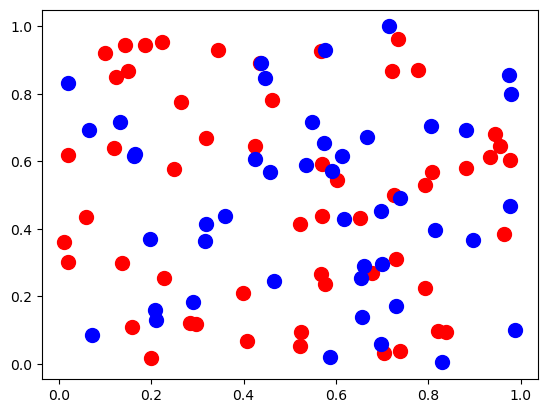

In [167]:
plt.scatter (x[y_pred == 0,0],x[y_pred == 0,1] ,s = 100, c='r', label = 'Cluster 1')
plt.scatter (x[y_pred == 1,0],x[y_pred  == 1,1] ,s = 100, c='b', label = 'Cluster 2')
plt.show()


In [168]:
from sklearn.metrics import classification_report
print(classification_report (y,y_pred))

              precision    recall  f1-score   support

           0       0.44      0.48      0.46        50
           1       0.42      0.38      0.40        50

    accuracy                           0.43       100
   macro avg       0.43      0.43      0.43       100
weighted avg       0.43      0.43      0.43       100



In [169]:
cm = confusion_matrix (y,y_pred)
print (cm)


[[24 26]
 [31 19]]


In [171]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'x' is your feature data and 'y' is your target labels (classes)

# Generate or load sample data (replace this with your dataset)
np.random.seed(0)
x = np.random.rand(100, 2)  # Example 2D feature data (100 samples, 2 features)
y = np.random.randint(0, 2, size=100)  # Example target labels (binary: 0 or 1)

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a Support Vector Classifier (SVC) with a polynomial kernel
classifier = SVC(kernel='poly')

# Train the classifier using the training data
classifier.fit(x_train, y_train)

# Make predictions on the entire dataset 'x' (for demonstration purposes)
y_pred = classifier.predict(x)

# Evaluate the model's performance
accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

# Display the classification report
print("\nClassification Report:")
print(classification_report(y, y_pred))

# Compute and display the confusion matrix
cm = confusion_matrix(y, y_pred)
print("\nConfusion Matrix:")
print(cm)


Accuracy: 0.51

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.90      0.65        50
           1       0.55      0.12      0.20        50

    accuracy                           0.51       100
   macro avg       0.53      0.51      0.42       100
weighted avg       0.53      0.51      0.42       100


Confusion Matrix:
[[45  5]
 [44  6]]


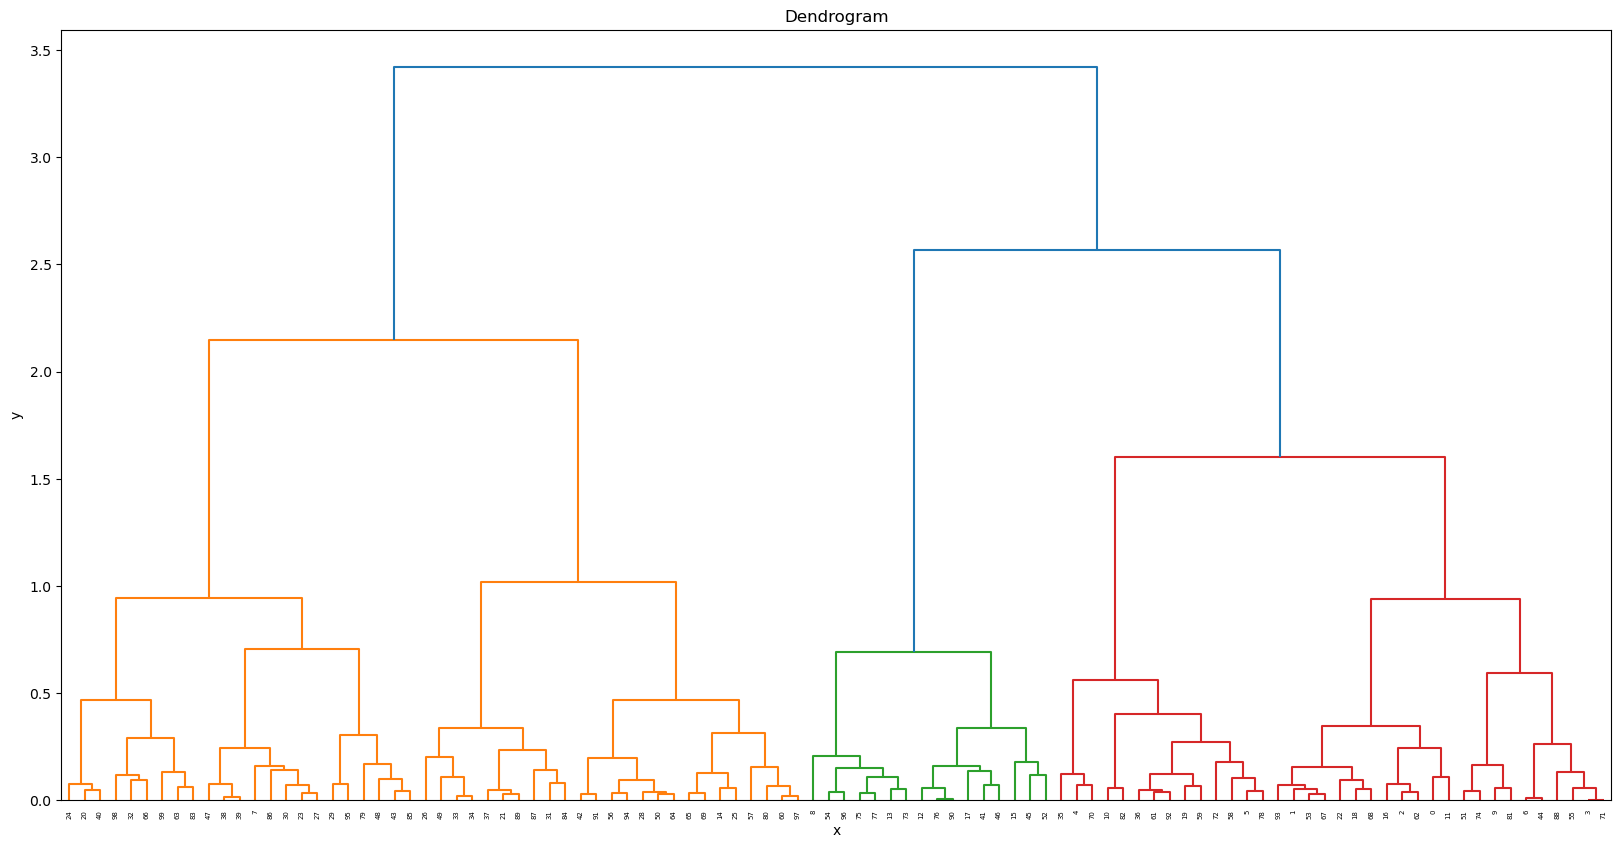

In [175]:
import scipy.cluster.hierarchy as sch
plt.rcParams['figure.figsize'] = (20,10)
dendrogram = sch.dendrogram(sch.linkage(x, method='ward'))
plt.title('Dendrogram')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


Cluster Labels:
[1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 0 0
 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1
 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0]


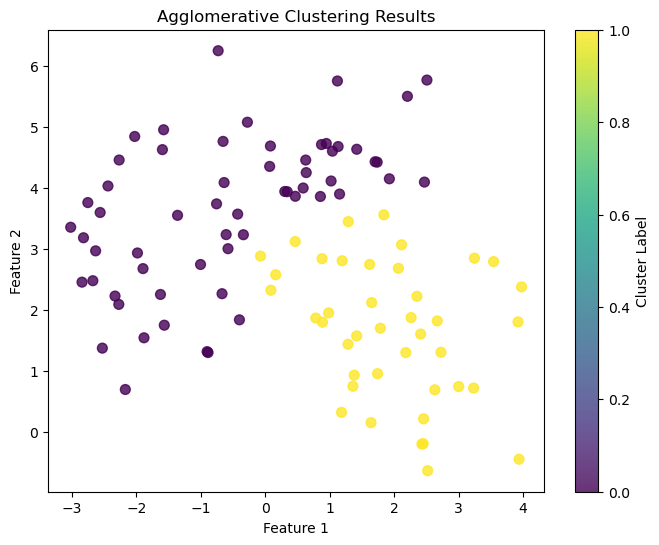

In [179]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

# Generate sample data (replace this with your dataset)
np.random.seed(0)
x, _ = make_blobs(n_samples=100, centers=3, n_features=2, random_state=0)

# Create an AgglomerativeClustering instance
hc = AgglomerativeClustering(n_clusters=2, linkage='ward')

# Perform clustering and obtain cluster labels
y_hc = hc.fit_predict(x)

# Display the cluster labels
print("Cluster Labels:")
print(y_hc)

# Visualize the clustering results (for 2D data)
plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1], c=y_hc, cmap='viridis', s=50, alpha=0.8)
plt.title('Agglomerative Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()


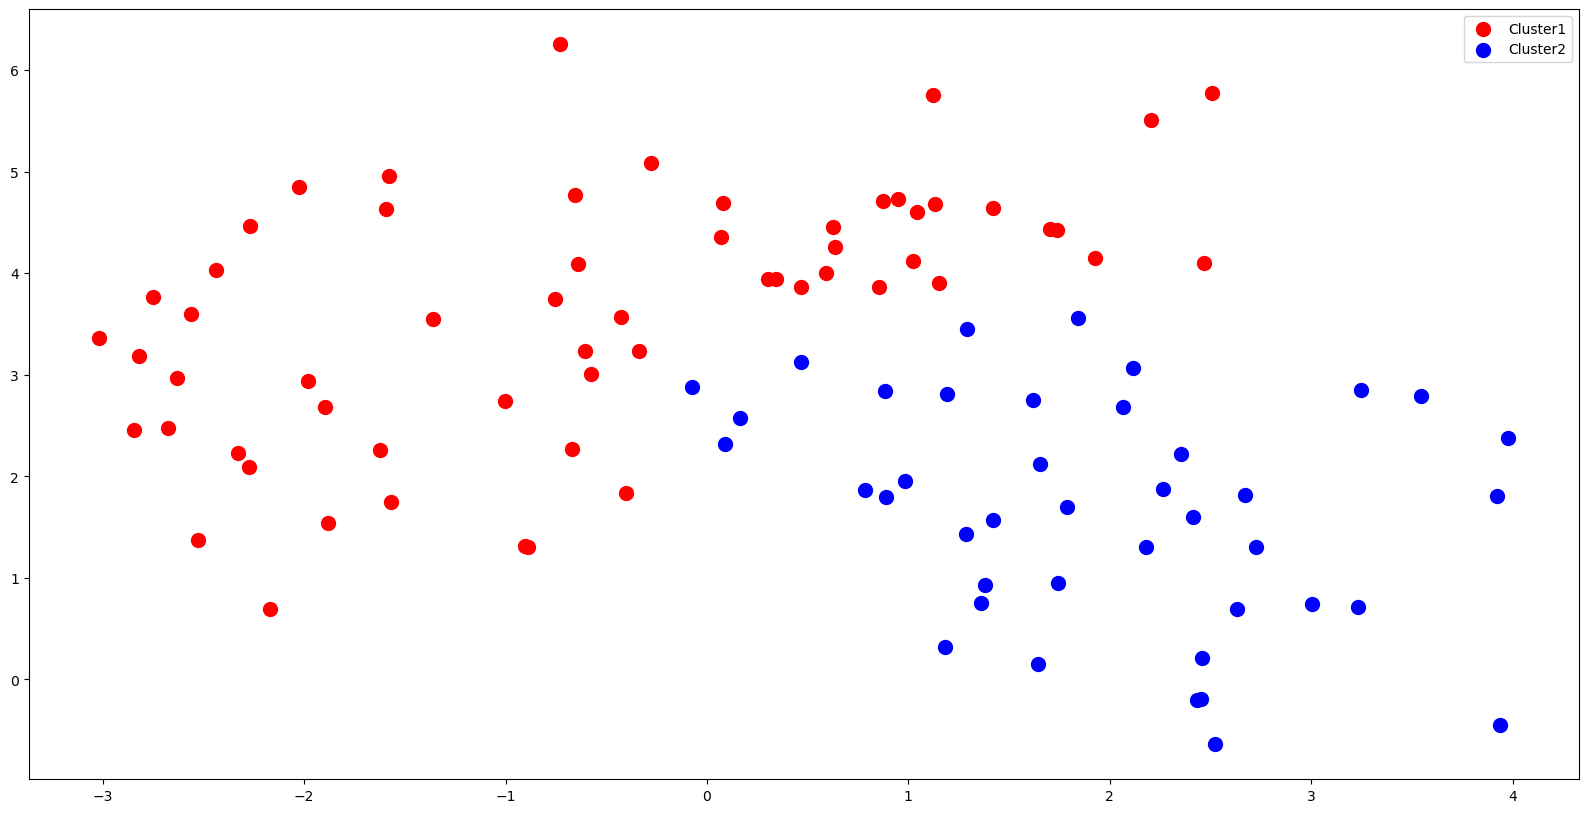

In [180]:
plt.scatter(x[y_hc==0,0], x[y_hc==0,1], s=100, c='red', label='Cluster1')
plt.scatter(x[y_hc==1,0], x[y_hc==1,1], s=100, c='blue', label='Cluster2')
plt.legend()
plt.show()
